In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Preprocessing

In [2]:
# read data
df = pd.read_csv('regression_geologic_dataset.csv')
df.describe()

,porosity,matrixperm,acousticimpedance,brittlenessratio,toc,vitrinitereflectance,productivitymetric
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,433.075000,3.265735,57.794340,3.970700,1.571440,50.000000
std,2.079824,173.101415,0.623574,16.955346,1.907119,0.240662,11.505310
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.744000,24.437856
25%,9.038750,312.250000,2.802250,45.306000,2.470000,1.416000,41.961030
50%,10.549000,403.500000,3.250500,59.412000,4.120000,1.568000,49.692285
75%,12.181750,528.750000,3.679500,69.915000,5.400000,1.714000,58.986667
max,16.485000,987.000000,5.093000,101.196000,8.720000,2.296000,77.270733


In [3]:
# drop feature
df.drop(['toc', 'matrixperm'], axis=1, inplace=True)
df.describe()

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance,productivitymetric
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,3.265735,57.794340,1.571440,50.000000
std,2.079824,0.623574,16.955346,0.240662,11.505310
min,4.585000,1.408000,13.128000,0.744000,24.437856
25%,9.038750,2.802250,45.306000,1.416000,41.961030
50%,10.549000,3.250500,59.412000,1.568000,49.692285
75%,12.181750,3.679500,69.915000,1.714000,58.986667
max,16.485000,5.093000,101.196000,2.296000,77.270733


In [4]:
# create feature matrix X and target matrix y
X = df.drop(['productivitymetric'], axis=1)
y = df['productivitymetric']

In [5]:
from sklearn.model_selection import train_test_split

# split holdout set (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [6]:
from sklearn.preprocessing import StandardScaler

# train the scaler using X_train
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Learning Curve

**Learning Curve** visualize the trade-off between bias and variance, and its dependence on training set size. Here, we will vary the training/validation set size to explore the behavior of the model score as a function of **the number of training points**, which can be done by using increasingly larger subsets of the data to fit our model. Hopefully, we can address the question of *whether adding more training data will help our model*.

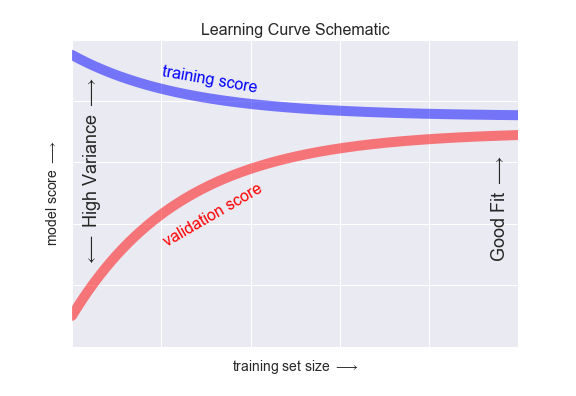

The general behavior from a learning curve:
* A model of a given complexity will **overfit a small dataset**: this means the training score will be relatively high, while the validation score will be relatively low.
* A model of a given complexity will **underfit a large dataset**: this means that the training score will decrease, but the validation score will increase.
* A model will **never**, except by chance, **give a better score to the validation set than the training set**: this means the curves should keep getting closer together but never cross.

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

In [9]:
train_sizes=np.linspace(0.05,1,9)

In [10]:
train_sizes_abs, train_scores, test_scores = learning_curve(Ridge(), 
                                                            X_train_scaled, 
                                                            y_train, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

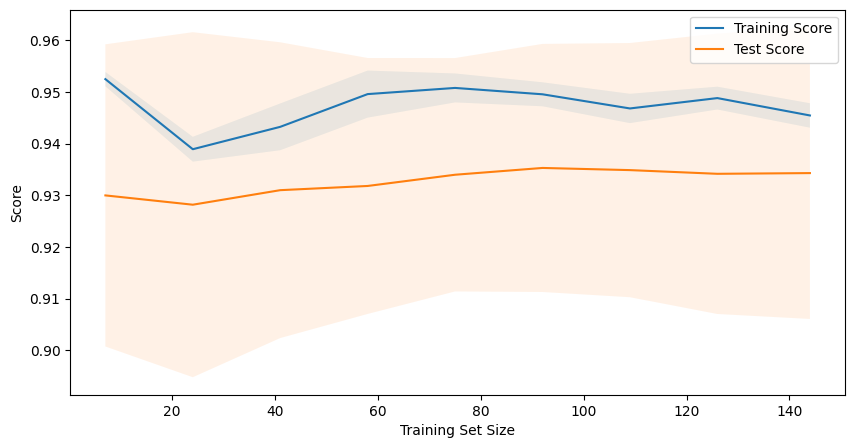

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs, train_scores_mean, label='Training Score')
axes.plot(train_sizes_abs, test_scores_mean, label='Test Score')

axes.fill_between(train_sizes_abs,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1)

axes.fill_between(train_sizes_abs,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

### Validation Curve

**Validation Curve** visualize the trade-off between bias and variance, and its dependence on model complexity. Here, we will vary the hyperparameters and evaluate its effect on training and validation score.
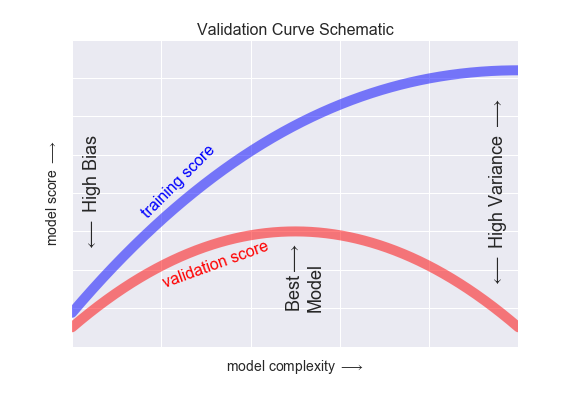

In [13]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np

In [14]:
param_range = np.logspace(-7,5,13)
param_range

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [15]:
train_scores, test_scores = validation_curve(estimator=Ridge(),
                                             X=X_train_scaled,
                                             y=y_train,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10)

In [16]:
pd.DataFrame(train_scores)

,0,1,2,3,4,5,6,7,8,9
0,0.946207,0.945708,0.946960,0.943083,0.942800,0.946699,0.944420,0.947328,0.941903,0.950110
1,0.946207,0.945708,0.946960,0.943083,0.942800,0.946699,0.944420,0.947328,0.941903,0.950110
2,0.946207,0.945708,0.946960,0.943083,0.942800,0.946699,0.944420,0.947328,0.941903,0.950110
3,0.946207,0.945708,0.946960,0.943083,0.942800,0.946699,0.944420,0.947328,0.941903,0.950110
4,0.946207,0.945708,0.946960,0.943083,0.942800,0.946699,0.944420,0.947328,0.941903,0.950110
5,0.946207,0.945708,0.946960,0.943083,0.942800,0.946699,0.944420,0.947328,0.941903,0.950110
6,0.946206,0.945707,0.946959,0.943082,0.942799,0.946699,0.944419,0.947327,0.941902,0.950109
7,0.946138,0.945645,0.946887,0.943016,0.942734,0.946636,0.944351,0.947257,0.941824,0.950042
8,0.941050,0.940874,0.941471,0.938044,0.937700,0.941906,0.939132,0.941986,0.935992,0.945128
9,0.794600,0.799441,0.789249,0.792417,0.785715,0.801262,0.787734,0.792047,0.775191,0.803237


In [17]:
pd.DataFrame(test_scores)

,0,1,2,3,4,5,6,7,8,9
0,0.934655,0.929388,0.927634,0.963751,0.964663,0.926104,0.948498,0.920600,0.962858,0.864707
1,0.934655,0.929388,0.927634,0.963751,0.964663,0.926104,0.948498,0.920600,0.962858,0.864707
2,0.934655,0.929388,0.927634,0.963751,0.964663,0.926104,0.948498,0.920600,0.962858,0.864707
3,0.934655,0.929388,0.927634,0.963751,0.964663,0.926104,0.948498,0.920600,0.962858,0.864707
4,0.934655,0.929387,0.927635,0.963752,0.964664,0.926103,0.948499,0.920599,0.962858,0.864709
5,0.934655,0.929378,0.927646,0.963755,0.964668,0.926092,0.948508,0.920586,0.962861,0.864720
6,0.934660,0.929282,0.927751,0.963783,0.964713,0.925979,0.948599,0.920456,0.962892,0.864831
7,0.934621,0.928270,0.928699,0.963992,0.965123,0.924814,0.949432,0.919102,0.963128,0.865784
8,0.928708,0.914526,0.930890,0.960307,0.966189,0.910441,0.952007,0.901955,0.959906,0.865698
9,0.773580,0.715167,0.785897,0.787613,0.853833,0.738006,0.818064,0.689389,0.799776,0.736758


In [18]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

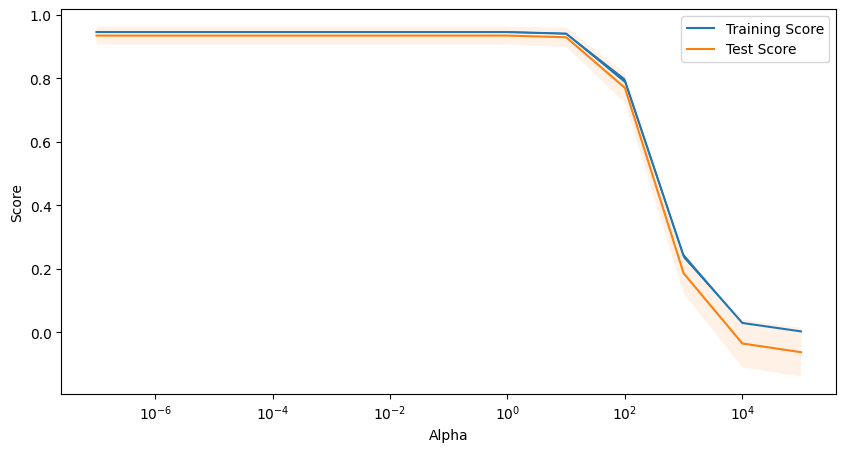

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.semilogx(param_range, train_scores_mean, label='Training Score')
axes.semilogx(param_range, test_scores_mean, label='Test Score')

axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std)

axes.fill_between(param_range,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Alpha')
axes.set_ylabel('Score')
axes.legend()

### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# define searching domain (with grid search)
param_grid = {'solver':['auto', 'svd', 'cholesky'],
              'alpha': np.logspace(-7,5,5)}

# create search command
search = GridSearchCV(estimator=Ridge(),
                      param_grid=param_grid,
                      scoring='r2',
                      cv=5)

# command search step by training
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-07, 1.e-04, 1.e-01, 1.e+02, 1.e+05]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [21]:
pd.DataFrame(search.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.000548,0.000835,0.000267,0.00034,0.000274,0.000746,0.000693,0.00053,0.000593,0.000481,0.000472,0.000277,0.000281,0.000618,0.000318
std_fit_time,0.000189,0.001051,0.000006,0.000074,0.000016,0.000716,0.000511,0.000284,0.000641,0.000287,0.000158,0.000009,0.000054,0.000639,0.000077
mean_score_time,0.000271,0.000152,0.000142,0.000132,0.000122,0.000229,0.000201,0.000146,0.000133,0.000222,0.000336,0.000123,0.000122,0.000191,0.000129
std_score_time,0.000236,0.00005,0.000039,0.000011,0.000002,0.000183,0.000118,0.000025,0.000024,0.000142,0.000236,0.000003,0.000015,0.000121,0.000013
param_alpha,0.0,0.0,0.0,0.0001,0.0001,0.0001,0.1,0.1,0.1,100.0,100.0,100.0,100000.0,100000.0,100000.0
param_solver,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky,auto,svd,cholesky
params,"{'alpha': 1e-07, 'solver': 'auto'}","{'alpha': 1e-07, 'solver': 'svd'}","{'alpha': 1e-07, 'solver': 'cholesky'}","{'alpha': 0.0001, 'solver': 'auto'}","{'alpha': 0.0001, 'solver': 'svd'}","{'alpha': 0.0001, 'solver': 'cholesky'}","{'alpha': 0.1, 'solver': 'auto'}","{'alpha': 0.1, 'solver': 'svd'}","{'alpha': 0.1, 'solver': 'cholesky'}","{'alpha': 100.0, 'solver': 'auto'}","{'alpha': 100.0, 'solver': 'svd'}","{'alpha': 100.0, 'solver': 'cholesky'}","{'alpha': 100000.0, 'solver': 'auto'}","{'alpha': 100000.0, 'solver': 'svd'}","{'alpha': 100000.0, 'solver': 'cholesky'}"
split0_test_score,0.936457,0.936457,0.936457,0.936457,0.936457,0.936457,0.936415,0.936415,0.936415,0.737882,0.737882,0.737882,-0.057551,-0.057551,-0.057551
split1_test_score,0.944177,0.944177,0.944177,0.944177,0.944177,0.944177,0.944274,0.944274,0.944274,0.761725,0.761725,0.761725,-0.08467,-0.08467,-0.08467
split2_test_score,0.950809,0.950809,0.950809,0.950809,0.950809,0.950809,0.950774,0.950774,0.950774,0.79044,0.79044,0.79044,0.000592,0.000592,0.000592


In [22]:
# after finding the best recipe for our model, we'll use the recipe to build the model
model_optimized = search.best_estimator_

In [23]:
# train the optimized model (why? to predict later)
model_optimized.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [24]:
# predict using the optimized model
y_pred_test = model_optimized.predict(X_test_scaled)
y_pred_test

array([61.64474879, 46.04622989, 37.30054469, 44.11135512, 44.11426386,
       65.59787309, 53.76437465, 33.9379585 , 35.84215473, 34.72020913,
       46.7102891 , 47.6091463 , 54.34787217, 27.54381003, 56.98572047,
       40.01883373, 55.62938975, 46.52543636, 54.72496844, 37.41472391,
       55.55990873, 33.81931528, 53.78827119, 60.57561073, 63.50488697,
       36.45084092, 38.05188229, 50.75882487, 64.71871246, 48.98954123,
       52.1603302 , 55.21332585, 38.63062251, 59.22139985, 62.94495634,
       48.41230301, 61.34187203, 49.29303062, 52.35930822, 43.55887867])

In [25]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.9427964959784674

## Permutation Feature Importance

In [26]:
from sklearn.inspection import permutation_importance

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled

,porosity,acousticimpedance,brittlenessratio,vitrinitereflectance
0,0.938074,-1.198760,0.646017,-0.149044
1,0.120723,-0.323832,-2.047983,-0.116948
2,0.598056,-0.936281,1.199236,-1.497059
3,-0.958181,0.936063,0.592636,-0.758860
4,0.205727,1.373526,0.646710,1.231066
...,...,...,...,...
155,-0.500464,0.813573,-1.175172,0.813824
156,2.778750,-2.983611,-2.376588,-2.331544
157,1.016540,-1.513733,-0.483300,0.011434
158,1.222512,1.023555,-0.886083,1.070588


In [28]:
r = permutation_importance(model_optimized,
                           X_train_scaled,
                           y_train,
                           n_repeats=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Library/Frameworks/Pytho

In [29]:
X_train_scaled.columns

Index(['porosity', 'acousticimpedance', 'brittlenessratio',
       'vitrinitereflectance'],
      dtype='object')

In [30]:
r.importances_mean

array([1.62712885, 0.02566205, 0.30326017, 0.05903571])

In [31]:
r.importances_std

array([0.18244559, 0.00440627, 0.02707885, 0.00664056])